In [1]:
graph = {"A":["D","C","B"],
   "B":["E"],
   "C":["G","F"],
   "D":["H"],
   "E":["I"],
   "F":["J"]}
def dfs_non_recursive(graph, source):

       if source is None or source not in graph:

           return "Invalid input"

       path = []

       stack = [source]

       while(len(stack) != 0):

           s = stack.pop()

           if s not in path:

               path.append(s)

           if s not in graph:

               #leaf node
               continue

           for neighbor in graph[s]:

               stack.append(neighbor)

       return " ".join(path)
DFS_path = dfs_non_recursive(graph, "A")

print(DFS_path)

A B E I C F J G D H


In [2]:
def recursive_dfs(graph, source,path = []):

       if source not in path:

           path.append(source)
           if source not in graph:
               # leaf node, backtrack
               return path
           for neighbour in graph[source]:
               path = recursive_dfs(graph, neighbour, path)
       return path
graph = {"A":["B","C", "D"],
           "B":["E"],
           "C":["F","G"],
           "D":["H"],
           "E":["I"],
           "F":["J"]}

path = recursive_dfs(graph, "A")

print(" ".join(path))

A B E I C F J G D H


In [11]:
class Node:

       def __init__(self, value):

           self.value = value

           self.left = None

           self.right = None


       def insert(self, value):

           if value:

               if value < self.value:

                   if self.left is None:

                       self.left = Node(value)

                   else:

                       self.left.insert(value)

               elif value > self.value:

                   if self.right is None:

                       self.right = Node(value)

                   else:

                       self.right.insert(value)

               else:

                   self.value = value
                    root = Node(7)

                    root.insert(2)

                    root.insert(25)

                    root.insert(9)

                    root.insert(80)

                    root.insert(0)

                    root.insert(5)

                    root.insert(15)

                    root.insert(8)
       def dfs_binary_tree(root):

        if root is None:

           return

        else:

           print(root.value,end=" ")

           dfs_binary_tree(root.left)

           dfs_binary_tree(root.right)
        dfs_binary_tree(root)


IndentationError: unexpected indent (<ipython-input-11-27f11b4835e4>, line 39)

In [13]:
class Node:

       def __init__(self, value):

           self.value = value

           self.left = None

           self.right = None


       def insert(self, value):

           if value:

               if value < self.value:

                   if self.left is None:

                       self.left = Node(value)

                   else:

                       self.left.insert(value)

               elif value > self.value:

                   if self.right is None:

                       self.right = Node(value)

                   else:

                       self.right.insert(value)

               else:

                   self.value = value
root = Node(7)

root.insert(2)

root.insert(25)

root.insert(9)

root.insert(80)

root.insert(0)

root.insert(5)

root.insert(15)

root.insert(8)
def dfs_binary_tree(root):

       if root is None:

           return

       else:

           print(root.value,end=" ")

           dfs_binary_tree(root.left)

           dfs_binary_tree(root.right)
dfs_binary_tree(root)

7 2 5 25 9 8 15 80 

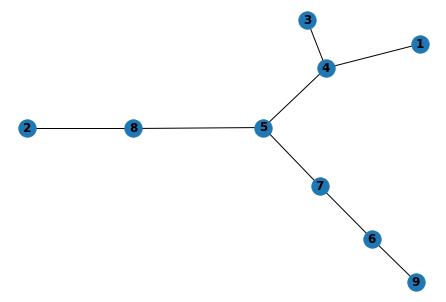

In [14]:
import networkx as nx

G = nx.Graph() #create a graph

G.add_node(1) # add single node

G.add_node(2)

G.add_node(3)

G.add_node(4)

G.add_node(5)

G.add_nodes_from([6,7,8,9]) #add multiple nodes
#adding edges
G.add_edge(5,8)

G.add_edge(5,4)

G.add_edge(5,7)

G.add_edge(8,2)

G.add_edge(4,3)

G.add_edge(4,1)

G.add_edge(7,6)

G.add_edge(6,9)
import matplotlib.pyplot as plt

nx.draw(G, with_labels=True, font_weight='bold')

plt.show()

In [15]:
dfs_output = list(nx.dfs_preorder_nodes(G, source=5))

print(dfs_output)

[5, 8, 2, 4, 3, 1, 7, 6, 9]


In [18]:
dag = nx.digraph.DiGraph()

dag.add_nodes_from(['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I'])

dag.add_edges_from([('A', 'B'), ('A', 'E'), ('B', 'D'), ('E', 'C'),
                      ('D', 'G'),('C', 'G'),('C', 'I'), ('F', 'I')])
def dfs(dag, start, visited, stack):

       if start in visited:

           # node and all its branches have been visited
           return stack, visited
       if dag.out_degree(start) == 0:

           # if leaf node, push and backtrack
           stack.append(start)

           visited.append(start)

           return stack, visited

       #traverse all the branches
       for node in dag.neighbors(start):

           if node in visited:
               continue
           stack, visited = dfs(dag, node, visited, stack)

       #now, push the node if not already visited
       if start not in visited:

           print("pushing %s"%start)

           stack.append(start)

           visited.append(start)

       return stack, visited

def topological_sort_using_dfs(dag):

       visited = []

       stack=[]

       start_nodes = [i for i in dag.nodes if dag.in_degree(i)==0]

   #     print(start_nodes)

       for s in start_nodes:

           stack, visited = dfs(dag, s, visited, stack)

       print("Topological sorted:")

       while(len(stack)!=0):

           print(stack.pop(), end=" ")
topological_sort_using_dfs(dag)

pushing D
pushing B
pushing C
pushing E
pushing A
pushing F
Topological sorted:
H F A E C I B D G 

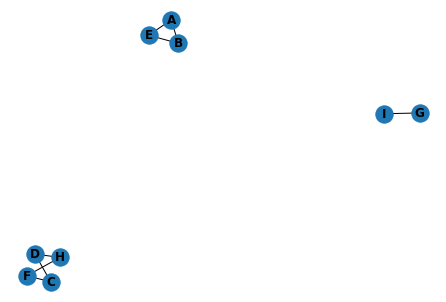

In [19]:
graph = nx.Graph()

graph.add_nodes_from(['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I'])

graph.add_edges_from([('A', 'B'), ('B', 'E'), ('A', 'E')]) #component 1

graph.add_edges_from([('C', 'D'), ('D', 'H'), ('H', 'F'), ('F', 'C')]) #component 2
graph.add_edge('G','I') #component 3
import matplotlib.pyplot as plt
nx.draw(graph, with_labels=True, font_weight='bold')
plt.show()

In [22]:
def find_connected_components(graph):

       visited = []

       connected_components = []

       for node in graph.nodes:

           if node not in visited:

               cc = [] #connected component

               visited, cc = dfs_traversal(graph, node, visited, cc)

               connected_components.append(cc)

       return connected_components

def dfs_traversal(graph, start, visited, path):

       if start in visited:

           return visited, path

       visited.append(start)

       path.append(start)

       for node in graph.neighbors(start):

           visited, path = dfs_traversal(graph, node, visited, path)

       return visited, path
connected_components = find_connected_components(graph)

print("Total number of connected components =", len(connected_components))

for cc in connected_components:

    print(cc)

Total number of connected components = 3
['A', 'B', 'E']
['C', 'D', 'H', 'F']
['G', 'I']
